# 参考　https://qiita.com/SaitoTsutomu/items/39a7888594594ff59523

- 利用者の初期化

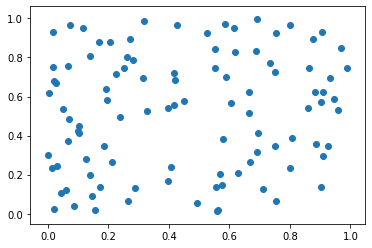

In [25]:
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import copy
np.random.seed(1)

n_user = 100
n_cand_firehouse, n_firehouse = 100, 3
loc_user = np.random.rand(n_user, 2)
cand_loc_firehouse = copy.deepcopy(loc_user)
plt.scatter(*loc_user.T);

- 施設配置問題の定式化

In [39]:
from pulp import *
from ortoolpy import addbinvars, addvars

m = LpProblem()
x = addbinvars(n_user, n_cand_firehouse)
y = addbinvars(n_cand_firehouse)
m += lpSum(((loc_user[i][0]-cand_loc_firehouse[j][0])**2+(loc_user[i][1]-cand_loc_firehouse[j][1])**2) * x[i][j]
           for i in range(n_user) for j in range(n_cand_firehouse))
m += lpSum(y) <= n_firehouse
for i in range(n_user): #利用者iは,1つの消防署のみに割り当てられる
    m += lpSum(x[i]) == 1
    for j in range(n_cand_firehouse): #消防署のない場所に、利用者を割り当てられない
        m += x[i][j] <= y[j]

- 最適化

In [40]:
m.solve()
result = [int(value(lpDot(range(n_cand_firehouse), x[i]))) for i in range(n_user)] #各利用者がどこの消防署に配置されるかのリスト

- 可視化

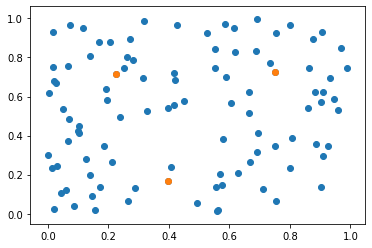

In [42]:
loc_firehouse = cand_loc_firehouse[np.unique(result)]
plt.scatter(*loc_user.T)
plt.scatter(*loc_firehouse.T)

### 今の3箇所は固定で、もう1つ消防署を作る

- yが消防署の配置の可否を決める → yを3箇所固定すれば良い

In [48]:
n_firehouse = 4 #消防署を4つにする

# 先ほどと全く同じ定式化
m = LpProblem()
x = addbinvars(n_user, n_cand_firehouse)
y = addbinvars(n_cand_firehouse)
m += lpSum(((loc_user[i][0]-cand_loc_firehouse[j][0])**2+(loc_user[i][1]-cand_loc_firehouse[j][1])**2) * x[i][j]
           for i in range(n_user) for j in range(n_cand_firehouse))
m += lpSum(y) <= n_firehouse
for i in range(n_user): #利用者iは,1つの消防署のみに割り当てられる
    m += lpSum(x[i]) == 1
    for j in range(n_cand_firehouse): #消防署のない場所に、利用者を割り当てられない
        m += x[i][j] <= y[j]

In [49]:
# 消防署を3箇所固定する(追加の制約式)
existing_firehouse = np.unique(result)
for j in existing_firehouse:
    m += y[j] >= 1

- 最適化

In [50]:
m.solve()
result2 = [int(value(lpDot(range(n_cand_firehouse), x[i]))) for i in range(n_user)] #各利用者がどこの消防署に配置されるかのリスト

- 可視化

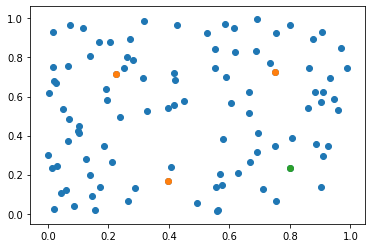

In [57]:
loc_firehouse_add = cand_loc_firehouse[list(set(result)^set(result2))]
plt.scatter(*loc_user.T)
plt.scatter(*loc_firehouse.T)
plt.scatter(*loc_firehouse_add.T)